# Assignment # 3 by Obaidullah GCS 1947

In [35]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt


np.set_printoptions(threshold=np.inf)
df = pd.read_csv('iris.data', header=None)
df = df.drop(4, axis=1)


In [36]:
data = df.to_numpy()
datap = data.copy()

records, col = data.shape

In [37]:


crm = np.zeros(records*records).reshape(records,records)


In [43]:

#calculate the Pearson's Coefficient for each row with other row

counter = 0
product1 = 0
denominator = 0
for idx, row in enumerate(data):
    for jdx, irow in enumerate(datap):
        #print("LOOP START")
        x = np.subtract(row, np.mean(row));
        #print(x)
        sqrx = np.sum(np.power(np.subtract(row, np.mean(row)),2));
        y = np.subtract(irow, np.mean(irow));
        #print(sqrx)
        #print('+++++++++++++++++++++++++++++++++++++++++')
        sqirow = np.sum(np.power(np.subtract(irow, np.mean(irow)),2));
        
        #print('+++++++++++++++++++++++++++++++++++++++++')
        numerator = np.sum(np.multiply(x,y));
        deno = np.multiply(sqrx,sqirow);
        r = np.divide(numerator, deno);
        crm[idx, jdx] = r
    #print("Correlation Matrix", crm)        
        #np.append(product1,np.multiply(x, y))
        #np.append(sqprd1,)
        
    #denominator = np.sum(product1)
  

#Uncomment this line below to print the Coefficient Matrix 
#print(crm)       
        
        

In [39]:
print(crm.shape)


#  THresholding Mean / Median Values in the Matrix
colmean = np.mean(crm, axis=0)
colmedian = np.median(crm, axis=0)


threshold = np.divide(colmean,colmedian)
threshold.shape
i = 0
for idx, col in enumerate(crm.T):
    for jdx, value in enumerate(col):
        #print("Threshold:", threshold[idx])
       # print("Value:", value)
        if value > threshold[idx]:
            crm.T[idx,jdx] = 1
            #print("+++++++++++++++++++++++++++++++++++", crm.T[idx,jdx])
        else:
            crm.T[idx,jdx] = 0
            #print("Value zero", crm.T[idx,jdx])
        i = i +1
        #print(i)
            
            

        

(150, 150)


In [41]:
#Run THis to Print coefficient Matrix


print(crm)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

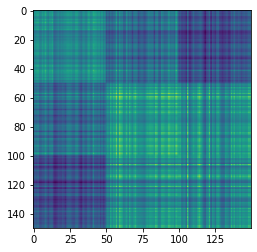

In [44]:
plt.imshow(crm)
plt.show()




#Deprecated Code






df = df.sub(df.mean(axis=1),axis=0)
df_shifted = df.copy()


df_shifted.loc[-1] = [0,0,0,0]
df_shifted.index = df_shifted.index + 1 
df_shifted.sort_index(inplace=True)


df_squared = df.copy()
df_squared = df_squared.pow(2,axis=0)

df_squared = df_squared.sum(axis=1)
df_squared_shifted = df_squared.copy()

df_squared_shifted.loc[-1] = 0
df_squared_shifted.index = df_squared_shifted.index + 1
df_squared_shifted.sort_index(inplace=True)
df_squared = df_squared.mul(df_squared_shifted, axis=0, fill_value=0)

df_squared
## Take square root of the denominator
df_squared = df_squared.pow(0.5,axis=0)
df_squared

df = df.mul(df_shifted,axis=0)
df = df.sum(axis=1)
df
pr = df.div(df_squared, axis=0)
pr